In [1]:
import numpy as np 
import pandas as pd 

%load_ext autoreload
%autoreload 2
import funciones_eda
import conexion_bd
import warnings
warnings.filterwarnings("ignore")

## Extracción

In [2]:
# Extraemos los datos de nuestra base de datos
df_homicidios = pd.read_sql("SELECT * FROM homicidios_hecho", con= conexion_bd.conexion)
df_homicidios

,Id_hecho,Rol,Sexo,Edad,Cantidad_victimas,Fecha,Año,Mes,Dia,Hora,...,Cruce,Dirección_normalizada,Comuna,Xy_(caba),Pos_x,Pos_y,Participantes,Victima,Acusado,Semestre
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,0 days 04:00:00,...,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,1
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,0 days 01:15:00,...,SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,1
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,0 days 07:00:00,...,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,1
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,0 days 00:00:00,...,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,1
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,0 days 05:20:00,...,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,0 days 06:20:00,...,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO,2
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,0 days 17:10:00,...,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,2
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,0 days 01:10:00,...,SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,2
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,0 days 00:43:00,...,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,2


Informacion basica

In [3]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Id_hecho               717 non-null    object         
 1   Rol                    717 non-null    object         
 2   Sexo                   717 non-null    object         
 3   Edad                   717 non-null    int64          
 4   Cantidad_victimas      717 non-null    int64          
 5   Fecha                  717 non-null    datetime64[ns] 
 6   Año                    717 non-null    int64          
 7   Mes                    717 non-null    int64          
 8   Dia                    717 non-null    int64          
 9   Hora                   717 non-null    timedelta64[ns]
 10  Hora_entero            717 non-null    int64          
 11  Lugar_del_hecho        717 non-null    object         
 12  Tipo_de_calle          717 non-null    object     

In [21]:
df_homicidios.columns

Index(['Id_hecho', 'Rol', 'Sexo', 'Edad', 'Cantidad_victimas', 'Fecha', 'Año',
       'Mes', 'Dia', 'Hora', 'Hora_entero', 'Lugar_del_hecho', 'Tipo_de_calle',
       'Calle', 'Cruce', 'Dirección_normalizada', 'Comuna', 'Xy_(caba)',
       'Pos_x', 'Pos_y', 'Participantes', 'Victima', 'Acusado', 'Semestre',
       'Dia semana', 'Tipo de día'],
      dtype='object')

In [4]:
df_homicidios.describe()

,Edad,Cantidad_victimas,Fecha,Año,Mes,Dia,Hora,Hora_entero,Comuna,Semestre
count,717.000000,717.000000,717,717.000000,717.000000,717.000000,717,717.000000,717.000000,717.000000
mean,42.101813,1.061367,2018-09-09 01:24:21.087866112,2018.174338,6.688982,15.953975,0 days 11:54:48.730822873,11.550907,7.430962,1.516039
min,1.000000,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0 days 00:00:00,0.000000,0.000000,1.000000
25%,28.000000,1.000000,2017-04-01 00:00:00,2017.000000,4.000000,9.000000,0 days 06:20:00,6.000000,4.000000,1.000000
50%,39.000000,1.000000,2018-07-07 00:00:00,2018.000000,7.000000,16.000000,0 days 11:20:00,11.000000,8.000000,2.000000
75%,55.000000,1.000000,2019-12-18 00:00:00,2019.000000,10.000000,23.000000,0 days 17:50:00,17.000000,11.000000,2.000000
max,95.000000,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,0 days 23:45:00,23.000000,15.000000,2.000000
std,19.081623,0.257024,NaN,1.672655,3.575140,8.674876,0 days 06:42:18.092186320,6.696054,4.385067,0.500092


Observando las estadisticas basicas del dataset obtenemos lo siguiente de las variables numericas:

Edad:
* Media: 42.1 años
* Mínimo: 1 año
* 25%: 28 años
* 50%: 39 años (mediana)
* 75%: 55 años
* Máximo: 95 años
* Desviación estándar: 19.08 años

Cabtidad de victimas:
* Media: 1.06 víctimas
* Mínimo: 1 víctima
* 25%: 1 víctima
* 50%: 1 víctima (mediana)
* 75%: 2 víctimas
* Máximo: 3 víctimas
* Desviación estándar: 0.26 víctimas

Fecha del hecho: 
* Fecha mínima: 2016-01-01
* Fecha media: 2018-09-09
* Fecha máxima: 2021-12-30

Año del hecho:
* Media: 2018.17 años
* Mínimo: 2016
* 25%: 2017
* 50%: 2018 (mediana)
* 75%: 2019
* Máximo: 2021
* Desviación estándar: 1.67 años

Mes del hecho:
* Media: 6.69 meses
* Mínimo: 1
* 25%: 4
* 50%: 7 (mediana)
* 75%: 10
* Máximo: 12
* Desviación estándar: 3.58 meses

Dia del hecho:
* Media: 15.95 días
* Mínimo: 1
* 25%: 9
* 50%: 16 (mediana)
* 75%: 23
* Máximo: 31
* Desviación estándar: 8.67 días

Comuna del hecho:
* Número de comunas: 15
* Comuna con más delitos: Comuna 1 (108 casos)
* Comuna con menos delitos: Comuna 15 (36 casos)



## Distribución por edad 

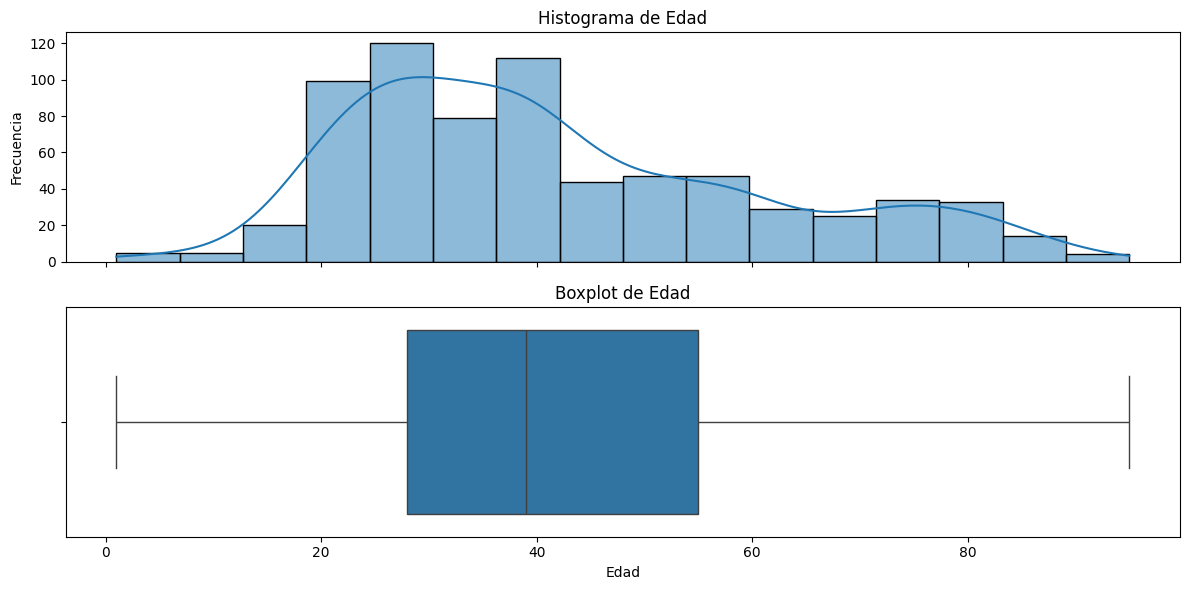

In [5]:
funciones_eda.distribucion_edad(df_homicidios)

La distribución por edad de las víctimas de los delitos muestra una asimetría positiva, con una mayor concentración de casos entre los 20 y los 50 años. La media es de 42,1 años, aproximadamente, como se indica en las estadisticas descriptivas, la mediana se encuentra alrededor de los 39 años y la moda de 35 años. El 25% de las víctimas tienen menos de 28 años, el 50% tienen entre 39 y 55 años y el 75% tienen más de 55 años.

El boxplot de la distribución por edad muestra que la distribución es relativamente uniforme, con una pequeña cantidad de valores atípicos

En general, se puede concluir que la mayoría de las víctimas de los delitos tienen entre 20 y 50 años, ya que son las personas que mas tiempo pasan tras el volante. Sin embargo, también hay un número significativo de víctimas menores de 20 años y mayores de 50 años.

se podría centrar la atención en la prevención de delitos entre los jóvenes o los ancianos.

## Edad de las victimas por año

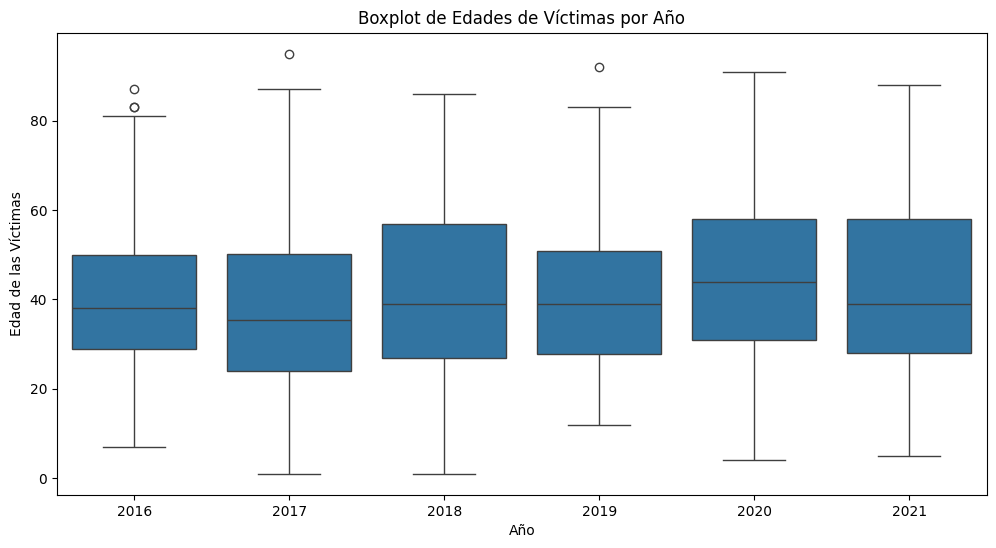

In [6]:
funciones_eda.distribucion_edad_por_anio(df_homicidios)

Las distribuciones de las edades se comportan muy parecido en los años registrados, con una mediana alrededor de los 40 años. Se observan algunos valores atípicos que tienen que ver con aultos mayores víctimas de los accidentes en los años 2016, 2017 y 2019

En general, se puede concluir que la mayoría de las víctimas de los delitos tienen entre 20 y 50 años, independientemente del año. Sin embargo, hay una tendencia a que las víctimas más jóvenes sean más frecuentes en los últimos años.

## Distribución de edades segun el rol

Estaremos estudiando cómo se distribuyen las edades para la condición de la victima, es decir el 'rol' en el hecho.

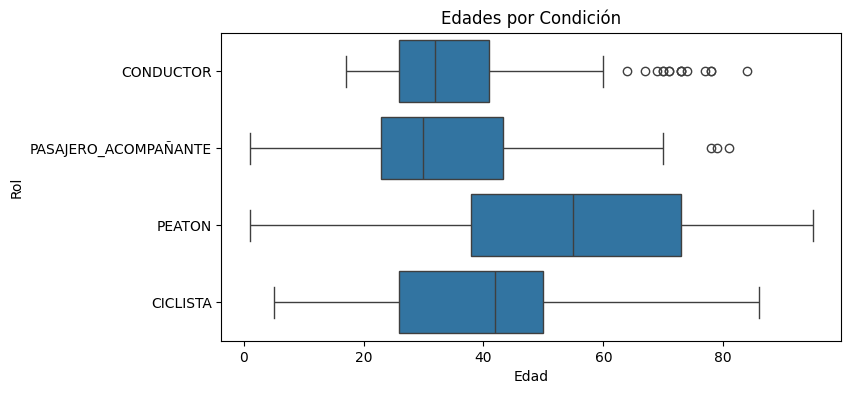

In [7]:
funciones_eda.edad_y_rol_victimas(df_homicidios)

De las edades promedio que se obeservan en los cuatro roles analizados, se encuentra que es similar la edad del conductor de auto y del pasajero acompañante, siendo de alrededor de los 35 años. Se observa que la edad mínima del conductor es de alrededor de los 18 años, pero en los demás roles es posible encontrar victimas de menor edad, lo que se se relaciona con ser niños que estan siendo trasladados.

En el caso de los peatones se observa mayor dispersión de las edades, desde niños muy pequeños a adultos mayores de cerca de los 90 años.

Si bien en conductor y pasajero acompañante se observan algunos valores atípicos, los mismos son edades esperables y se consideran casos especiales en el conjunto de datos.

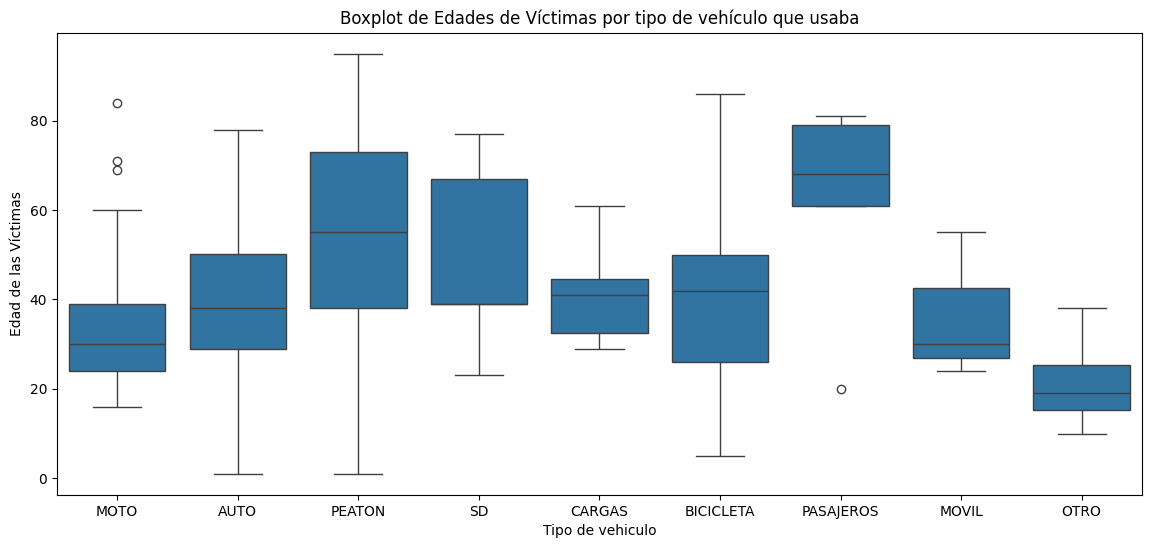

In [8]:
funciones_eda.distribucion_edad_por_victima(df_homicidios)

Se observa una gran dispersión de edades de víctimas fallecidas según el vehículo que ocupaban al momento del hecho. En el caso de victimas peatones es donde se observa un rango mas amplio de edades que en las demás categorías. Las victimas de mayor edad se observan mas concentradas cuando son pasajeros y victimas mas joven se observan en moto y otros.

## Distribución mensual de los accidentes

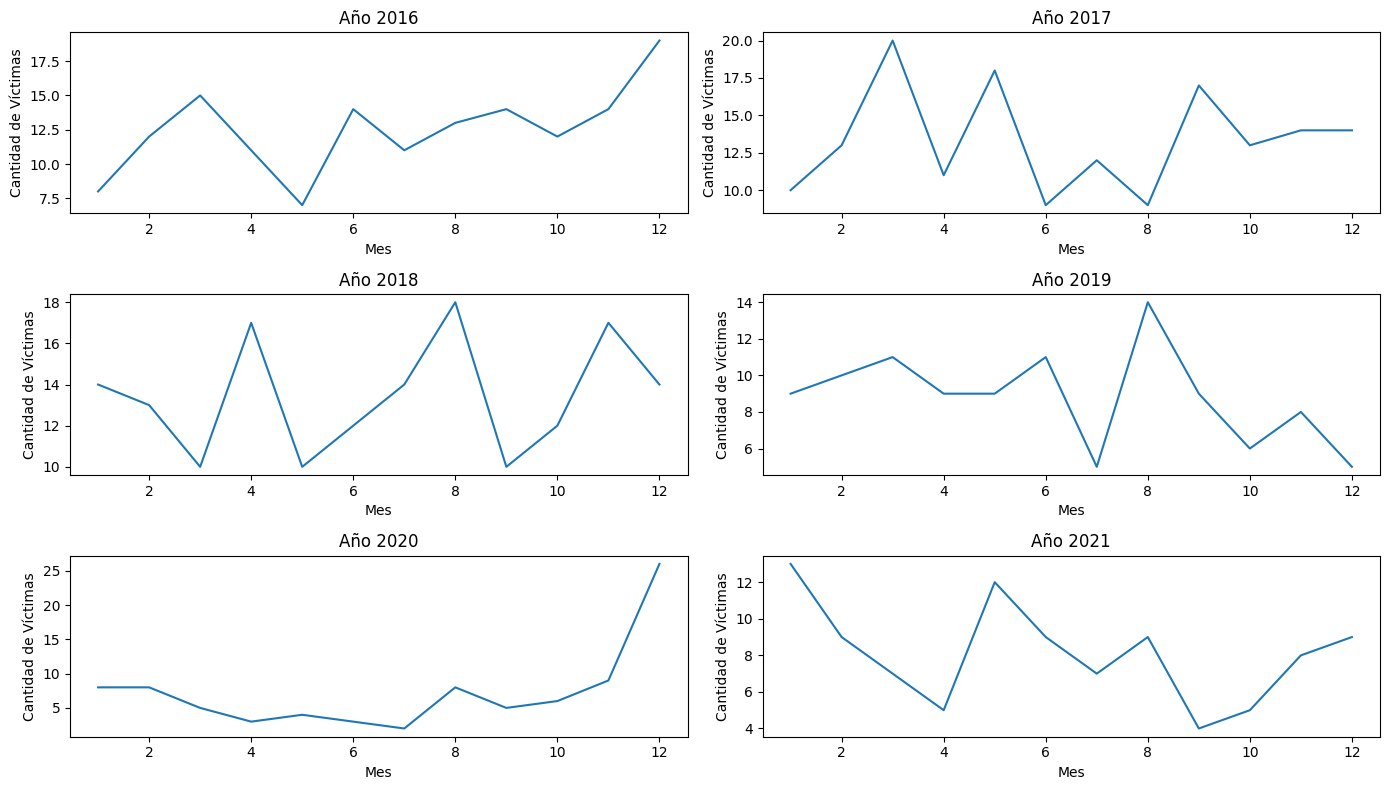

In [9]:
funciones_eda.accidentes_mensuales(df_homicidios)

La distribución mensual de los accidentes muestra que la mayoría de los accidentes ocurren en los meses de verano, entre diciembre y marzo. En estos meses, la temperatura es más alta y las personas suelen pasar más tiempo al aire libre, lo que aumenta el riesgo de accidentes.

La distribución mensual de los accidentes también muestra que hay un ligero aumento en el número de accidentes en los fines de semana. Esto podría deberse a que las personas suelen salir más los fines de semana, lo que aumenta la exposición al riesgo.

Estos resultados sugieren que los accidentes son más comunes en los meses de verano y los fines de semana. Las autoridades podrían tomar medidas para reducir el riesgo de accidentes durante estos períodos, como aumentar la vigilancia policial o realizar campañas de concienciación pública.

Tambien se observa con claridad es la disminución notable de accidentes fatales desde Diciembre de 2019 hasta Noviembre de 2020, relacionado con las medidas de cuarentena por la pandemia COVID-19.

## Cantidad de victimas por mes 

El mes con menor cantidad de víctimas tiene 51 víctimas
El mes con mayor cantidad de víctimas tiene 87 víctimas


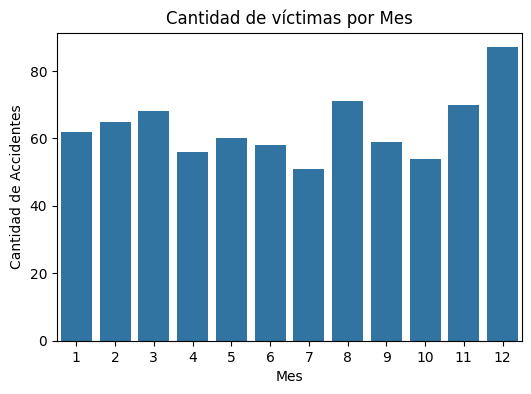

In [10]:
funciones_eda.cantidad_victimas_mensuales(df_homicidios)

Si se considera la distribución anual de todos los registros disponibles, se puede observar que el patrón que extiste a lo largo del año es un pico de accidentes en el mes de diciembre, siendo los meses con mas accidentes fatales Diciembre, Noviembre y Agosto. El mes con menos cantidad de accidentes fatales registrados es Julio y Septiembre.

## Distribución dias de la semana vs fines de semana

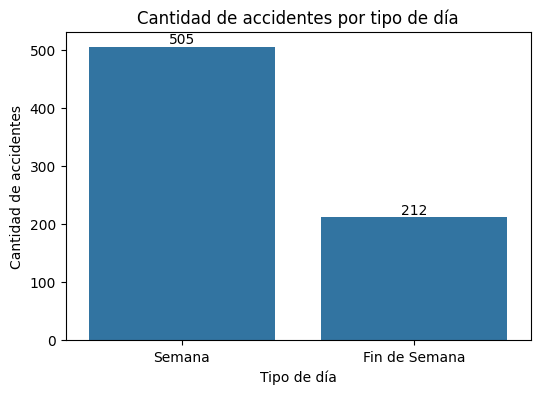

In [11]:
funciones_eda.cantidad_accidentes_semana_fin_de_semana(df_homicidios)

Del gráfico anterior se puede ver que la mayor cantidad de accidentes registrados fue durante la semana, siendo algo menos de la mitad los ocurridos el fin de semana. Esto contrasta con lo observado en el anterior análisis, donde se vieron las mayores cantidades entre el viernes y el lunes, aunque al acumular de lunes a viernes es una sola medida, es que los días de semana acumulan mas que los fines de semana.

## Cantidad de accidentes por año y sexo

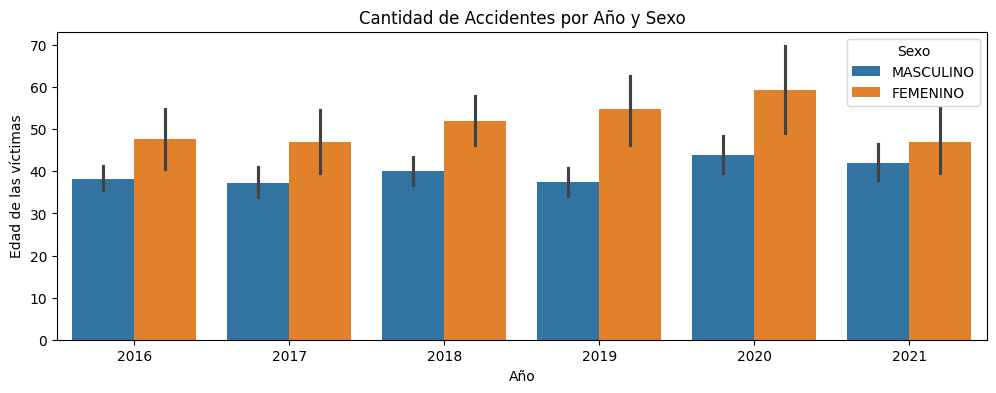

In [12]:
funciones_eda.cantidades_accidentes_por_anio_y_sexo(df_homicidios)

En el gráfico anterior se puede ver que hasta el 2020 había una tendencia creciente en las edades de las mujeres fallecidas que en hombres, con edades entre los 40 y 50 años, disminuyendo para 2021. En cuanto a los hombres, se observa una leve tendencia al aumento de la edad de fallecimientos pero sostenida alrededor de los 40 años de edad, pero igualmente menor edad que en mujeres.

Asi podemos respaldar lo que nos indica el grafico pero esta vez numericamente

In [13]:
resumen_sexo_año = df_homicidios.groupby(['Año', 'Sexo']).size().reset_index(name='Cantidad accidentes')
resumen_sexo_año

,Año,Sexo,Cantidad accidentes
0,2016,FEMENINO,27
1,2016,MASCULINO,119
2,2017,FEMENINO,36
3,2017,MASCULINO,104
4,2018,FEMENINO,38
5,2018,MASCULINO,111
6,2019,FEMENINO,27
7,2019,MASCULINO,77
8,2020,FEMENINO,16
9,2020,MASCULINO,65


Para analizar más concretamente la magnitud de la diferencia de estos dos grupos se decide utilizar el estadístico de Cohen, que es una medida utilizada en estadísticas que se utiliza comúnmente en el contexto de pruebas de hipótesis y comparación de grupos para determinar si una diferencia observada es significativa desde un punto de vista práctico. Se la denomina "d" y se calcula como:

d = (diferencia entre las medias de los grupos/disviacion estandar combinada de los grupos)
 
Donde:

Diferencia entre las medias de los grupos o condiciones es la media del grupo 1 menos la media del grupo 2.
Desviación estándar combinada de los grupos o condiciones es la varianza combinada de dos grupos.
El valor resultante de 
 indica cuántas desviaciones estándar se encuentra la diferencia observada con respecto a la variabilidad de los datos. Un valor mayor de 
 indica una mayor magnitud del efecto, mientras que un valor menor de 
 indica un efecto más pequeño.

In [14]:
grupo1_completo = df_homicidios[df_homicidios['Sexo'] == 'MASCULINO']['Edad']
grupo2_completo = df_homicidios[df_homicidios['Sexo'] == 'FEMENINO']['Edad']
# Se calcula el Cohen
d = funciones_eda.cohen(grupo1_completo, grupo2_completo)
print(f'El valor de Cohen es: {round(d,2)}')

El valor de Cohen es: -0.61


Se presenta un valor de 
 de Cohen de -0.61 entre los dos grupos analizados, esto implica un efecto de tamaño moderado alto. Esto significa que hay una diferencia marcada en la edad promedio entre estos grupos con dirección hacia las mujeres, es decir, que en promedio el grupo hombres tiende a ser más joven en comparación con el grupo de mujeres, que es lo que se intuía desde el anterior gráfico.

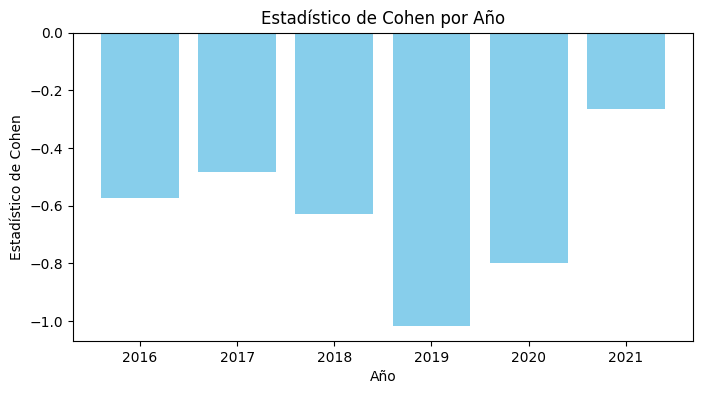

In [15]:
funciones_eda.cohen_por_año(df_homicidios)

A lo largo de los años, la relación negativa se mantiene, es decir, indican una consistente tendencia a lo largo de los años en la que, en promedio, el grupo de hombres tiende a ser más joven que el grupo de mujeres en términos de edades. La magnitud del efecto, medida por el valor de Cohen, varía de un año a otro. En 2019, el valor de Cohen es el más negativo, -1.02, lo que sugiere que la diferencia en edades entre hombres y mujeres es más pronunciada en ese año. Por otro lado, en 2021, el valor de Cohen es el menos negativo, -0.26, lo que indica una diferencia más pequeña en edades entre los dos grupos en ese año.

## Sexo de las victimas

Se analizaron algunos puntos de sexo en relación con la edad, en este apartado se intenta analizar la relación del sexo con las cantidades de accidente, los roles y el tipo de vehículo que ocupaba o si era peatón.

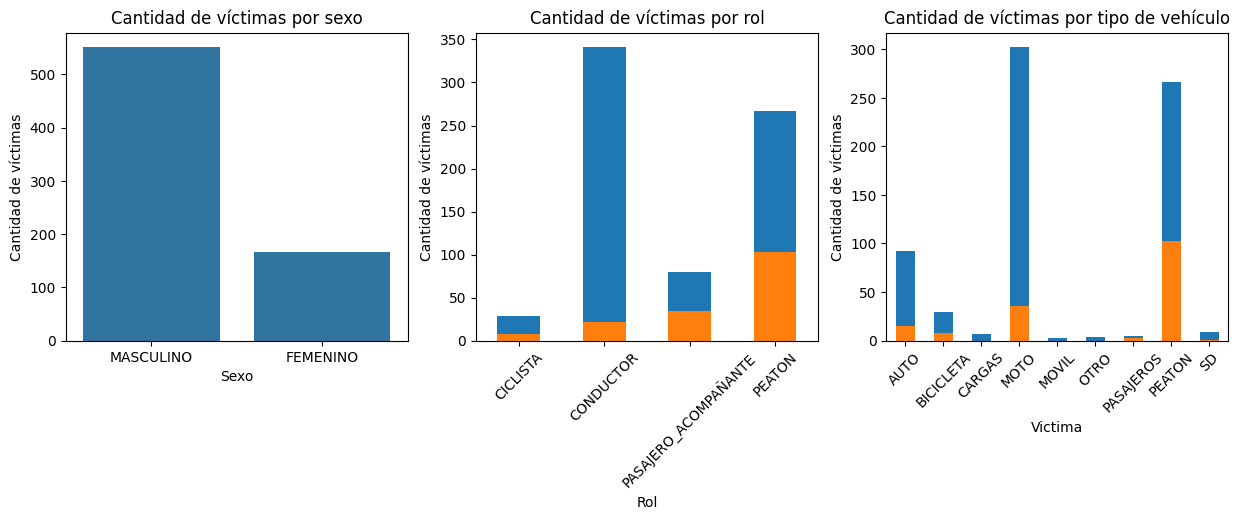

In [16]:
funciones_eda.cantidad_victimas_sexo_rol_victima(df_homicidios)

Se puede ver la diferencia en la cantidad de víctimas masculina por sobre las femeninas. Se aprecia la diferencia sobre todo en Conductor, donde la mayor proporción son masculinos y lo que llama la atención es que Motos es el vehículo con mayor proporción de accidentes con una alta proporción de masculinos. Los peatones también son las víctimas con mayor cantidad de fallecimientos en accidentes, con mayor proporción de masculinos, pero menos pronunciada la diferencia.

## Participantes en los accidentes

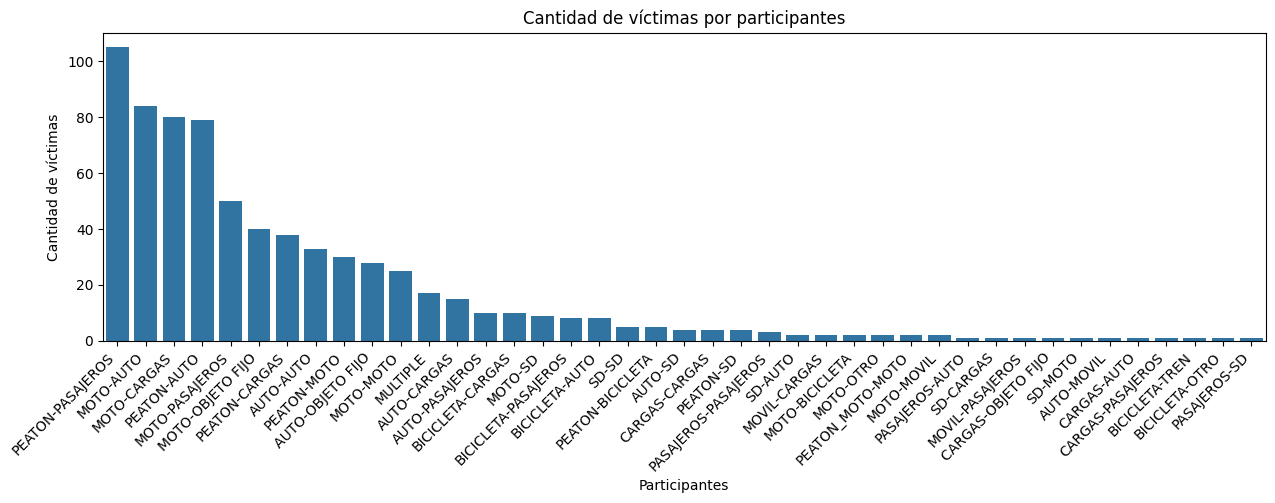

In [17]:
funciones_eda.cantidad_victimas_participantes(df_homicidios)

Resulta llamativo que la mayor cantidad de víctimas ocurren por hechos donde se involucran peatones con pasajeros. Según el diccionario de datos, Peatón es cualquier víctima distinta de cualquier ocupante de un vehículo, ya sea un conductor/a o un pasajero/a y Pasajero es cualquier personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia. Para tratar de encontrar un sentido a este punto, se observan los casos de estos registros.

In [18]:
df_homicidios[df_homicidios['Participantes'] == 'PEATON-PASAJEROS'][['Participantes', 'Victima', 'Acusado']]

,Participantes,Victima,Acusado
13,PEATON-PASAJEROS,PEATON,PASAJEROS
21,PEATON-PASAJEROS,PEATON,PASAJEROS
23,PEATON-PASAJEROS,PEATON,PASAJEROS
27,PEATON-PASAJEROS,PEATON,PASAJEROS
34,PEATON-PASAJEROS,PEATON,PASAJEROS
...,...,...,...
679,PEATON-PASAJEROS,PEATON,PASAJEROS
684,PEATON-PASAJEROS,PEATON,PASAJEROS
685,PEATON-PASAJEROS,PEATON,PASAJEROS
706,PEATON-PASAJEROS,PEATON,PASAJEROS


Lo que se interpreta de ver los datos asociados al registro de Participante como Peaton-Pasajero, es que si la víctima es Peatón y el acusado es Pasajero, se debe estar refiriendo que el hecho ocurrió asociado a una persona que subía, bajaba o se trasladaba por algún medio de transporte público. A partir de aquí se considerará de esta manera, pero teniendo en cuenta esta observación hasta confirmar o rechazar por parte de los interesados.

Por otra parte, en el gráfico anterior, se llega a apreciar que los hechos que involucran moto, auto y cargas son los que mayor cantidad de víctimas acumulan.

## Cantidad acusados

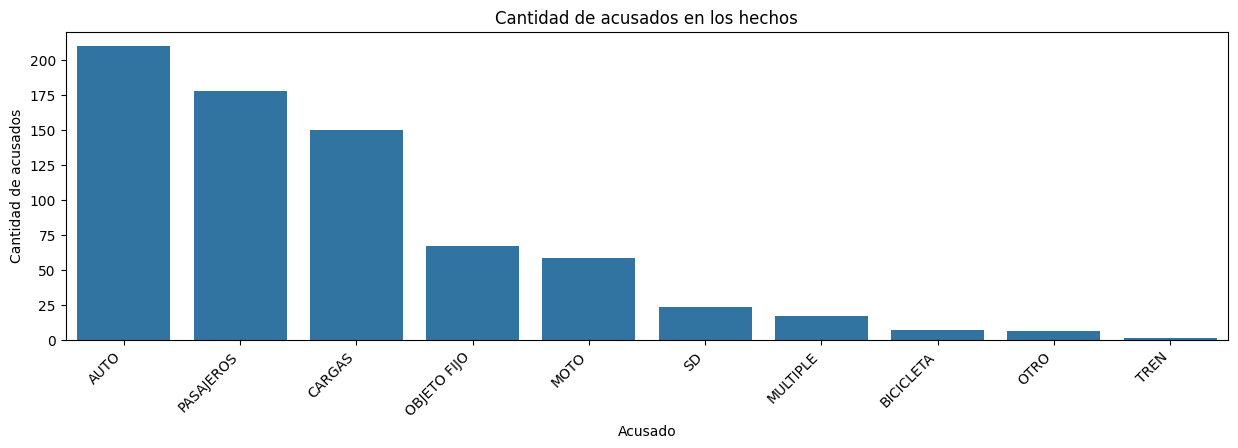

In [19]:
funciones_eda.cantidad_acusados(df_homicidios)

Lo que se interpreta de este gráfico es que la mayor responsabilidad en los hechos registrados es de los conductores de autos, seguidas de pasajeros y cargas (éste último se refiere a vehículos de carga). En cuanto a Pasajeros tiene sentido en relación con lo interpretado en el punto anterior, donde el vehículo involucrado es el transporte público, lo que da sentido a lo discutido.

## Tipo de calle donde ocurren los hechos

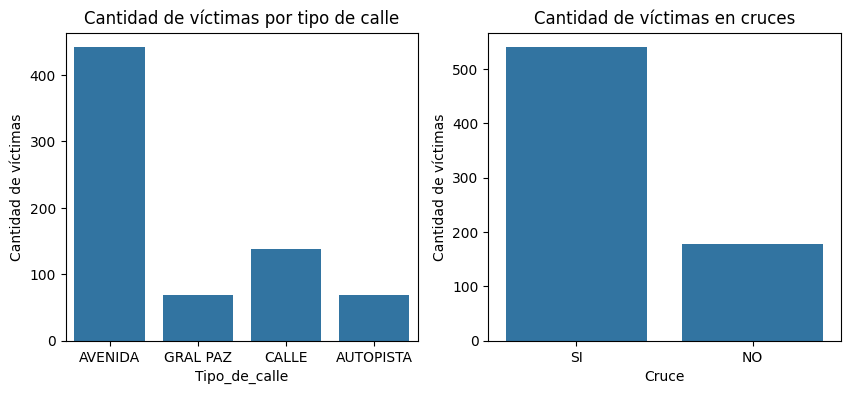

In [20]:
funciones_eda.accidentes_tipo_de_calle(df_homicidios)

Se pueden ver que la mayor cantidad de hechos con víctimas fatales ocurren en las avenidas y en particular en los cruces de calles.